<a href="https://colab.research.google.com/github/octkartiktiwari-bit/investing_pricechart/blob/main/invest_pricechart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipython-input-1339409280.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qqq = yf.download(


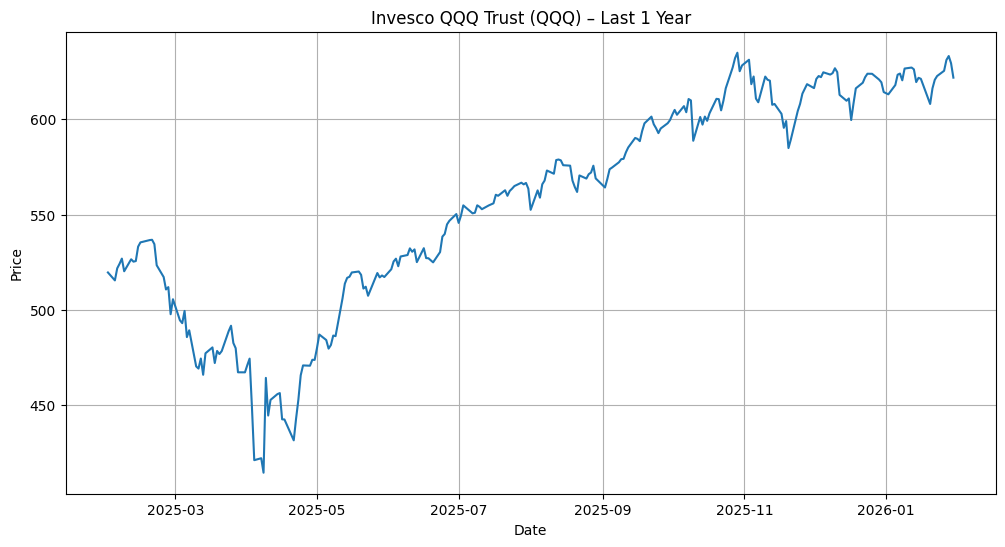

In [7]:
# Download last 1 year of QQQ data
qqq = yf.download(
    "QQQ",
    period="1y",
    interval="1d",
    progress=False
)

# Plot
plt.figure(figsize=(12,6))
plt.plot(qqq.index, qqq["Close"])
plt.title("Invesco QQQ Trust (QQQ) – Last 1 Year")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

Exact code to fetch NIFTY 50 chart data